# <img style="float: ;margin: 10px 10px 15px 15px;" src="http://www.symmetrymagazine.org/sites/default/files/breaking/wp-content/uploads/2010/11/cms_firstleadcoll.jpg" width="300"> 

# pileUp filter for Run2 pp analysis


For run 2 pp analysis, the pileup scenario (pileup probability) for 5 TeV reference run is around 1.2-1.4, where the pileup is defined as <strong> number of interactions per bunch crossing </strong>. The pileup events, if not excluded, would have a non-negligible effect to various of physics observables. For the simplest case, the pp spectra measurement, we want to measure the particle yield, or number of tracks in each $p_{T}$ bin, per event instead of per bunch crossing. Therefore, the pileup filter is necessary for precise measurements.

## <hr> Purpose of the notes

- Short introduction of various type of filters
- Samples for pileup study
- Cut distribution between with pileup and without pileup in MC and Data 
- Filter performance
- Data driven study of average pileup




### <hr> Types of filters

Multiple collisions events can be identified by the number of good primary vertices in the event. However, not all multiple collision events would lead to multiple reconstructed vertex, nor single collision event would lead to only one reconstructed vertex. In the multiple collision events with only one vertex reconstructed, the two collisions could be close enough that vertex reconstruction algorithm fails. In the case of of a single collisions, the decay of a short lived particle close to the beam line may result in the reconstruction of an additional primary vertex (vertex splitting). Overall, we want to optimize the distinguishability of single collisions events and multiple collisions events.

In order to balance between statistics and pileup contamination, one needs to look at the spatial distribution of the vertices, the correlation between number of tracks associated with the second populated vertex and dz value, to come up with a reasonable cut for the pileup filter. 

- <strong> dz cut </strong>: accept those events that have two vertices where dz, the z distance between the most populated vertex and other vertices, is larger than some value, i.e, <strong> 1 $cm$ </strong>
- <strong> Ntrk vs dz cut</strong>: according to the number of tracks w.r.t the second populated vertex, cut on a dz value
- <strong> vtx1 cut</strong>: accept events that only has 1 vertex. 

<strong> Different types of filter can be obtained by combining different cuts. In HIN-15-006, HIN-15-009, FSQ-15-002, the pileup filter was,</strong>

dz (1cm) + dzNtrkCut (olvFilter_dz1p0 below)

### Available filters now

- <strong>  pileupFilter_vtx1 </strong>, with only 1 reconstructed vertex
- <strong>  pileupFilter_Gplus </strong>, with only dzNtrk cut
- <strong>  olvFilter_dz1p0 </strong>, with dzNtrk cut plus dz cut at 1 cm. olvFilter stands for "overlapping vertex filter", which only filters those events with 2 or more vertices are too close to each other. 

below are the demonstration of the cut variables and <strong> Ntrk vs dz cut table </strong>


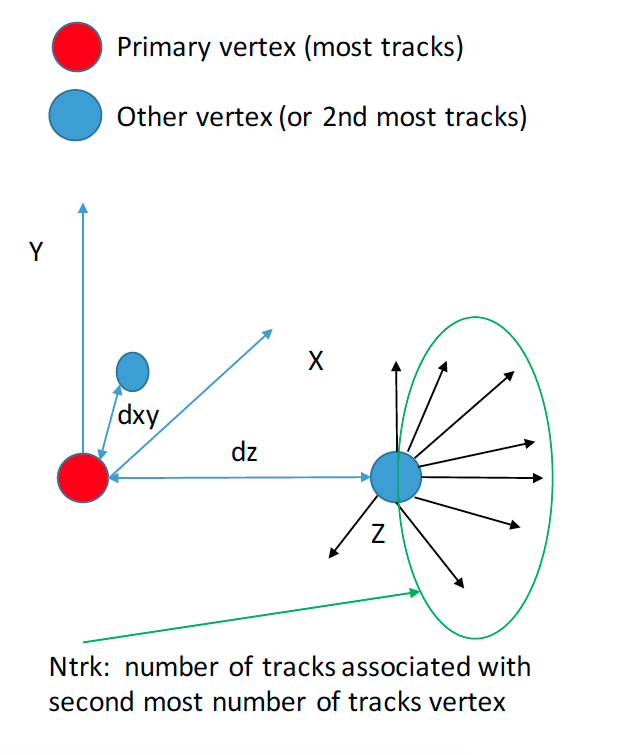

In [1]:
from IPython.display import Image
pathname = "../files/"
cartoon = "cartoon.png"
Image(filename = pathname + cartoon)

In [6]:
from prettytable import PrettyTable
from prettytable import ALL

Lx=PrettyTable(["nTrk","dz(cm)"])
Lx.padding_width = 1
Lx.hrules = ALL

#LnTrk = ["0-2","3","4","5","6-8","9","10","11-12","13","14-19","20-30","30+"]
#Ldz = ["N/A","4.8","1.9","1.2","0.8","0.6","0.5","0.4","0.3","0.2","0.1","0.0"]

TnTrk = ["0-1","2","3","4","5","6","7","8-10","11-13","14-22","22+","N/A"]
Tdz = ["N/A","4.0","1.5","1.0","0.6","0.5","0.4","0.3","0.2","0.1","0.0","N/A"]

Space = ["","","","","","","","","","","",""]

for num in range(len(TnTrk)):
	Lx.add_row([ TnTrk[num], Tdz[num]])

print Lx

+-------+--------+
|  nTrk | dz(cm) |
+-------+--------+
|  0-1  |  N/A   |
+-------+--------+
|   2   |  4.0   |
+-------+--------+
|   3   |  1.5   |
+-------+--------+
|   4   |  1.0   |
+-------+--------+
|   5   |  0.6   |
+-------+--------+
|   6   |  0.5   |
+-------+--------+
|   7   |  0.4   |
+-------+--------+
|  8-10 |  0.3   |
+-------+--------+
| 11-13 |  0.2   |
+-------+--------+
| 14-22 |  0.1   |
+-------+--------+
|  22+  |  0.0   |
+-------+--------+
|  N/A  |  N/A   |
+-------+--------+


### <hr> Samples for pileup study

For pileup study, we have used a few different samples to determine what cut values should be used. 
- For MC 
    - pp Pythia8 MinBias sample with <strong> no pileup </strong>, <A HREF="https://cmsweb.cern.ch/das/request?view=list&instance=prod%2Fphys03&input=%2FMinBias_TuneCUETP8M1_5p02TeV-pythia8%2Ftwang-MinBias_TuneCUETP8M1_5p02TeV_pythia8_pp502Fall15_MCRUN2_71_V1_v1_AOD_CMSSW_7_5_4_20151113-78e0f1f0cb22713d3582ee21ebad8b42%2FUSER">Click Me for DAS link</A>
    - pp Pythia8 MinBias sample with <strong> exactly pileup = 2 </strong>, <A HREF="https://cmsweb.cern.ch/das/request?input=%2FNeutrinos5Mfor5TeVpp%2Fgsfs-pp5TeVPileupAOD__2015_11_18-0fbbb68e7aea6e58696cc3c7d18d21c8%2FUSER&instance=prod%2Fphys03">Click Me for DAS link</A>
    - pp Pythia8 MinBias sample with <strong> exactly pileup = 3 </strong>, <A HREF="https://cmsweb.cern.ch/das/request?input=%2FNeutrinos5Mfor5TeVpp%2Fgsfs-pp5TeV_Pileup_3_RECO_2016_01_24-24bc0f2c47ba7a24fbd3e8494fe06297%2FUSER&instance=prod%2Fphys03">Click Me for DAS link</A>
- For Data
    - pp 5TeV reference <strong> low pileup </strong> run, json file:<pre><code>/afs/cern.ch/cms/CAF/CMSCOMM/COMM_DQM/certification/Collisions15/5TeV/Cert_262168-262172_5TeV_PromptReco_Collisions15_25ns_LOWPU_JSON.txt </pre></code>
    - pp 5TeV reference <strong> nominal run </strong>, json file:
    <pre><code>/afs/cern.ch/cms/CAF/CMSCOMM/COMM_DQM/certification/Collisions15/5TeV/Cert_262081-262273_5TeV_PromptReco_Collisions15_25ns_JSON.txt </pre></code> - <A HREF="https://cmsweb.cern.ch/das/request?view=list&limit=50&instance=prod%2Fglobal&input=dataset%3D%2FMinimumBias1%2FRun2015E-PromptReco-v1%2FAOD">Click Me for DAS link</A>
    - pp 5TeV reference run, with fill = 4643 and run = 262274, PD:MinimumBias12
    

In [3]:
from prettytable import PrettyTable
x = PrettyTable(["Samples", "pileup", "Events(M)"])
x.align["City name"] = "l" # Left align city names
x.padding_width = 1 # One space between column edges and contents (default)
x.add_row(["pythia8 MinBias",1, 4.2])
x.add_row(["pythia8 MinBias",2, 4.1])
x.add_row(["pythia8 MinBias",3, 5.0])
x.add_row(["pp low pileup run", 0.1, 8.1])
x.add_row(["pp nominal pileup run", 1.4, 50.0])

print x

+-----------------------+--------+-----------+
|        Samples        | pileup | Events(M) |
+-----------------------+--------+-----------+
|    pythia8 MinBias    |   1    |    4.2    |
|    pythia8 MinBias    |   2    |    4.1    |
|    pythia8 MinBias    |   3    |    5.0    |
|   pp low pileup run   |  0.1   |    8.1    |
| pp nominal pileup run |  1.4   |    50.0   |
+-----------------------+--------+-----------+


### <hr>  Cut distribution 

The distribution below is to demonstrate what the cut values are and how the distributions look like between <strong> no pileup and pileup </strong> as well as between <strong> MC and DATA </strong>.
- Ntrk vs dz, the events that are accepted are <strong> below </strong> the black line


In [3]:
MCppDxyDz = "MC_PlotDxyvsDz.png"
MCppDzNtrk = "MC_PlotDzvsNtrk.png"
DATAppDxyDz = "DATA_PlotDxyvsDz.png"
DATAppDzNtrk = "DATA_PlotDzvsNtrk.png"
DCA = "DCA.png"

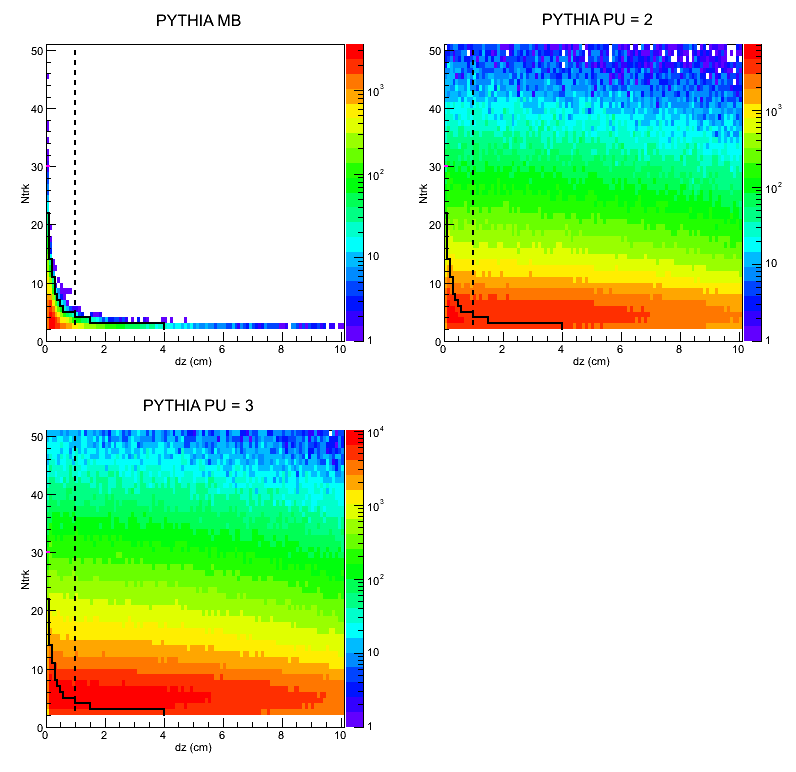

In [4]:
Image(filename = pathname + MCppDzNtrk )

<strong> Above plots are from MC: dz vs dxy, and Ntrk vs dz

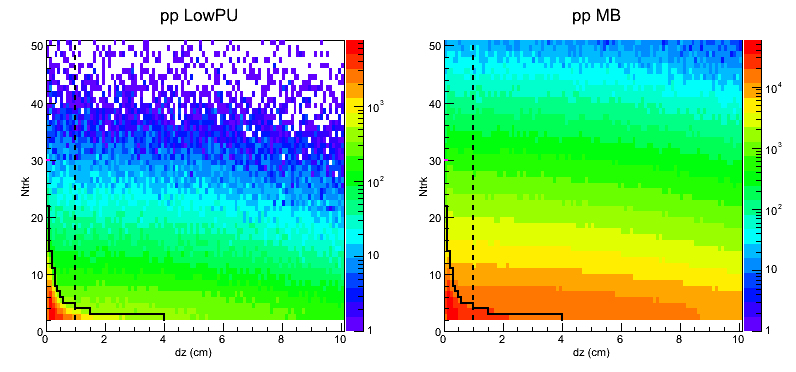

In [5]:
Image(filename = pathname + DATAppDzNtrk )

<strong> Above plots are from DATA: dz vs dxy, and Ntrk vs dz

### <hr> Filter performance in general

Filter performance, is to test how "effective" the filters are with respect to different pileup scenario. The filter performance, or event accepted fraction, is defined as <strong> the ratio of number of events between with filters and no filter.</strong> The integrated filter performance is listed in the tablel below, while the $p_{T}$ and $N^{offline}_{trk}$ differential are presented in the plots below. 

In [8]:
from prettytable import PrettyTable
x = PrettyTable(["Filters","PYTHIA MB (%)", "PYTHIA PU = 2 (%)","PYTHIA PU = 3 (%)", "pp LowPU (%)", "pp MB (%)"])
x.padding_width = 1 # One space between column edges and contents (default)
x.add_row(["pileUpFilter_vtx1",98.7,35.5,7.4,94.9,71.5])
x.add_row(["pileUpFilter_Gplus",99.9,42.8,10.4,96.7,74.3])
x.add_row(["olvFilter_dz1p0",99.9,97.6,92.0,99.8,98.3])
print x


+--------------------+---------------+-------------------+-------------------+--------------+-----------+
|      Filters       | PYTHIA MB (%) | PYTHIA PU = 2 (%) | PYTHIA PU = 3 (%) | pp LowPU (%) | pp MB (%) |
+--------------------+---------------+-------------------+-------------------+--------------+-----------+
| pileUpFilter_vtx1  |      98.7     |        35.5       |        7.4        |     94.9     |    71.5   |
| pileUpFilter_Gplus |      99.9     |        42.8       |        10.4       |     96.7     |    74.3   |
|  olvFilter_dz1p0   |      99.9     |        97.6       |        92.0       |     99.8     |    98.3   |
+--------------------+---------------+-------------------+-------------------+--------------+-----------+


### <hr> Filter performance 1 

Testing the acceptted events fraction <strong> as a function of $N^{offline}_{trk}$ </strong> on different MC and Data sample, with PU and without PU (or MB and LowPU in data), with various of filters
- MC (MB with no pileup vs pileup = 2 vs pileup = 3)
- DATA (MB with nominal pileup condition 1.4 vs low pileup sample)


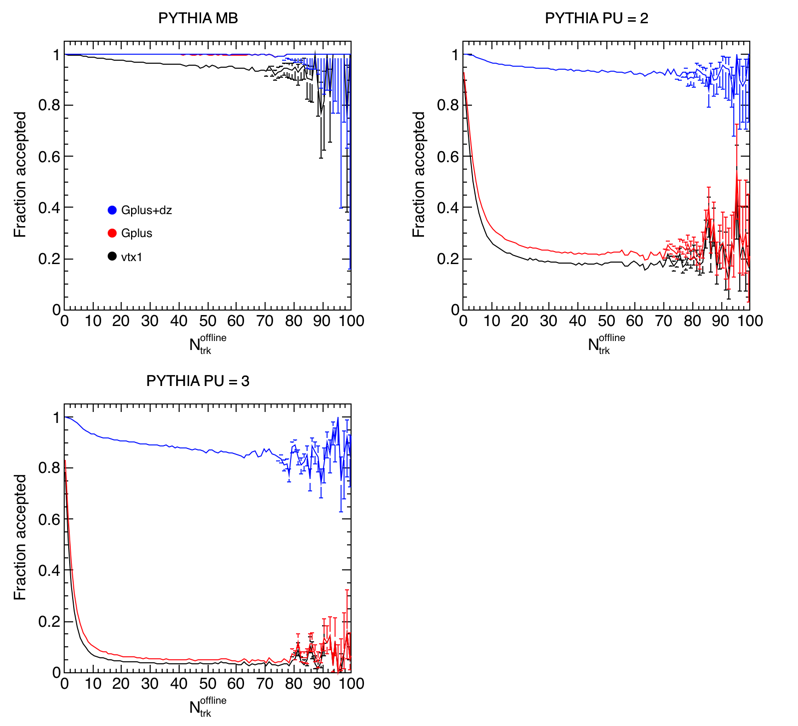

In [2]:
MC_fraction = 'pileUpFilterEfficiency_MC.png'
DATA_fraction = 'pileUpFilterEfficiency_DATA.png'
Image(filename = pathname + MC_fraction)

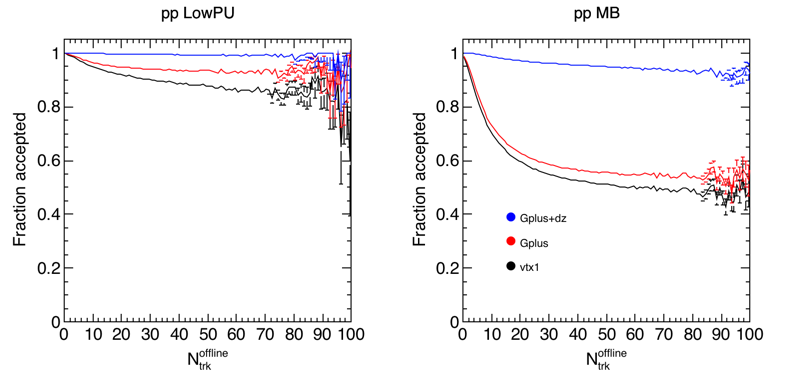

In [3]:
Image(filename = pathname + DATA_fraction)

### <hr> Filter performance 2

Testing the acceptted events fraction <strong> as a function of leading $p_{T}$ </strong> on different MC and Data sample, with PU and without PU (or MB and LowPU in data), with various of filters
- MC (MB with no pileup vs pileup = 2 vs pileup = 3)
- DATA (MB with nominal pileup condition 1.4 vs low pileup sample)

The statistics in these samples are expected to be low at higher $p_{T}$

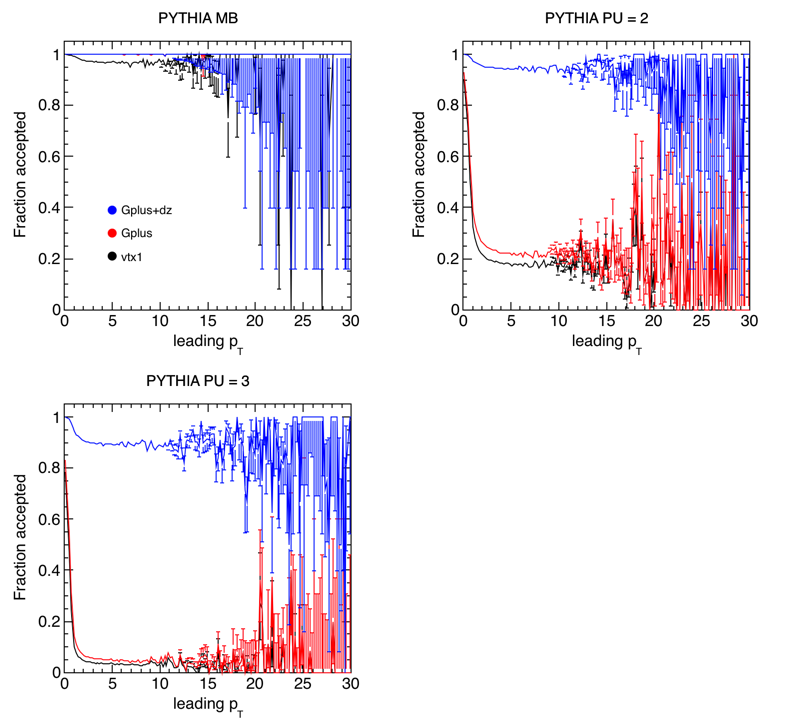

In [4]:
MC_pt_fraction = 'pileUpFilterEfficiency_MC_pT.png'
DATA_pt_fraction = 'pileUpFilterEfficiency_DATA_pT.png'
Image(filename = pathname + MC_pt_fraction)

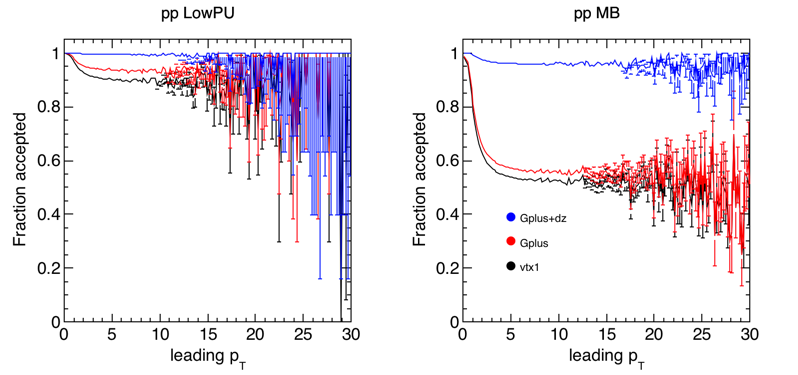

In [11]:
Image(filename = pathname + DATA_pt_fraction)

### Data pileup estimation 

There are 2 ways of estimating the data pileup in this study. One is to use the HLT MinBias rate to estimate the data pileup as a function of lumi section, assuming the probablity of having multiple collisions falls under Poisson distribution. Then use the average pileup to estimate the multiple collision fraction among all the events. The second one is to use the number of vertex distribution from MC, combined with pileup = 1, 2, 3, to fit that of data in order to extract the fraction of having 1,2,3 collisions among all events. The average pileup would be just the weighted sum of those different fractions. 

- Use the HLT MinBias rates to estimate the average pileup assuming Poisson distribution, and there is <strong> no other requirement on the events other than the trigger selection (HF2OR)</strong>

$$
P(c\geqslant 1) = \frac{rates \cdot prescale}{colliding bunches \cdot frequency}\\
$$

Therefore, the average pileup $\mu$ can be derived from

$$
P(c\geqslant 1) = 1 - P (c = 0) = 1- \exp(-\mu)\\
$$

Then the multiple collision fraction (has 2 or more collisions in one bunch crossing) can be calculated as, 

$$Multi.Collision.Frac = \frac{P(c\geqslant 2)}{P(c\geqslant 1)}\\$$

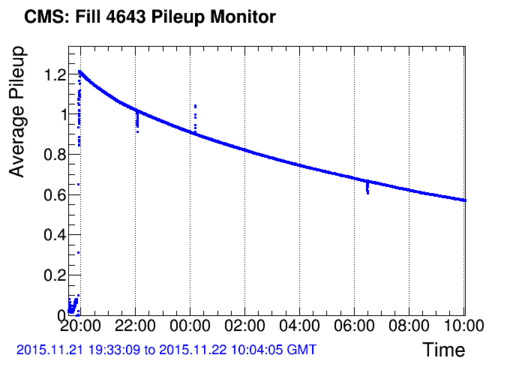

In [7]:
CMSpileUpMonitor = 'CMSpileUpMonitor.png'
averagePileUp_multCollisionFrac = 'averagePileUp_multCollisionFrac.png'
numberOfEventsRun262274_eventAccepted = 'numberOfEventsRun262274_eventAccepted.png'
removedFractionRun262274_ilterEfficiency = 'removedFractionRun262274_ilterEfficiency.png'

Image(filename = pathname + CMSpileUpMonitor)

## The selection lumi is from 00:50 to 7:24

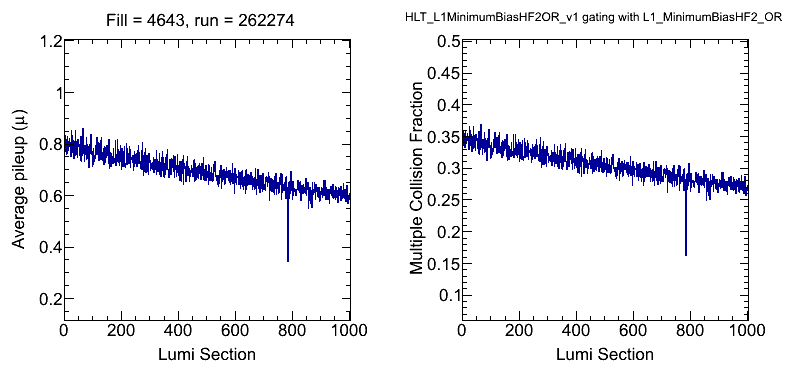

In [4]:
Image(filename = pathname + averagePileUp_multCollisionFrac)

### Filter fraction on data run = 272274 
- number of events and event fraction accepted
- fraction removed and filter efficiency


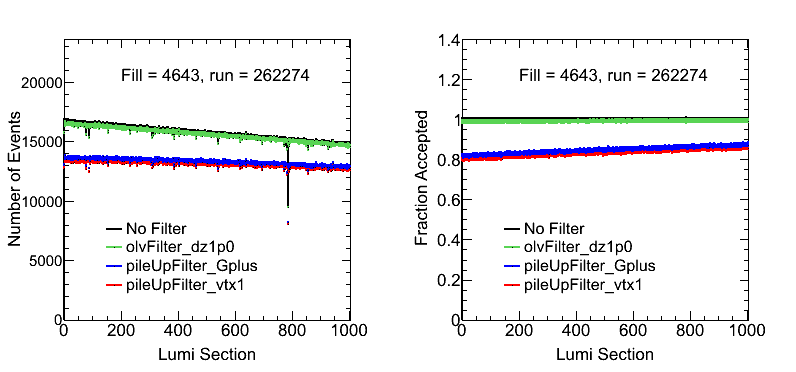

In [5]:
Image (filename = pathname + numberOfEventsRun262274_eventAccepted)

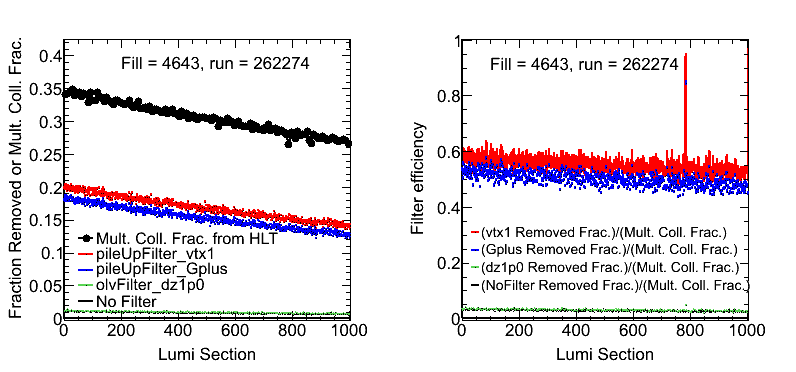

In [6]:
Image (filename = pathname + removedFractionRun262274_ilterEfficiency)

Use number of vertex distribution of different pileup scenario in MC ( pileup =0, 1, 2, 3...) to fit that of data to get the average pileup. The vertex needs to be not fake and has more than 2 tracks associated with the vertex (minTrack = 3) and the trigger selection are the same between MC and Data. 

- Let's assume $q_{0}$, $q_{1}$, $q_{2}$, and $q_{3}$ are corresponding to number of vertices equal to 0, 1, 2, and 3 respectively in MC pileup 0 (no collision means $q_{0} = 1$ and others are 0)

- Let's assume $x_{0}$, $x_{1}$, $x_{2}$, and $x_{3}$ are corresponding to number of vertices equal to 0, 1, 2, and 3 respectively in MC pileup 1

- Let's assume $y_{0}$, $y_{1}$, $y_{2}$, and $y_{3}$ are corresponding to number of vertices equal to 0, 1, 2, and 3 respectively in MC pileup 2

- Let's assume $z_{0}$, $z_{1}$, $z_{2}$, and $z_{3}$ are corresponding to number of vertices equal to 0, 1, 2, and 3 respectively in MC pileup 3

- Let's assume $d_{0}$, $d_{1}$, $d_{2}$, and $d_{3}$ are corresponding to number of vertices equal to 0, 1, 2, and 3 respectively in data

Thus, assuming the number of vertices distribution in data is a <strong>linear combination </strong>of that of MC with pileup 0, 1, 2, 3,

$ c_{0}q_{0}+c_{1}x_{0}+c_{2}y_{0}+c_{3}z_{0} = d_{0}$ 

$ c_{0}q_{1}+c_{1}x_{1}+c_{2}y_{1}+c_{3}z_{1} = d_{1}$ 

$ c_{0}q_{2}+c_{1}x_{2}+c_{2}y_{2}+c_{3}z_{2} = d_{2}$ 

$ c_{0}q_{3}+c_{1}x_{3}+c_{2}y_{3}+c_{3}z_{3} = d_{3}$ 

where $c_{0}$, $c_{1}$, $c_{2}$ and $c_{3}$ are the fraction of each number of collisions (pileup) in data. 

The avaerge pileup is $1c_{1}+2c_{2}+3c_{3}$

Therefore, this becomes an easy algebra problem, which is to solve this 4 variables 4 equations. We can use the cramer's rule to calculate the solution. 


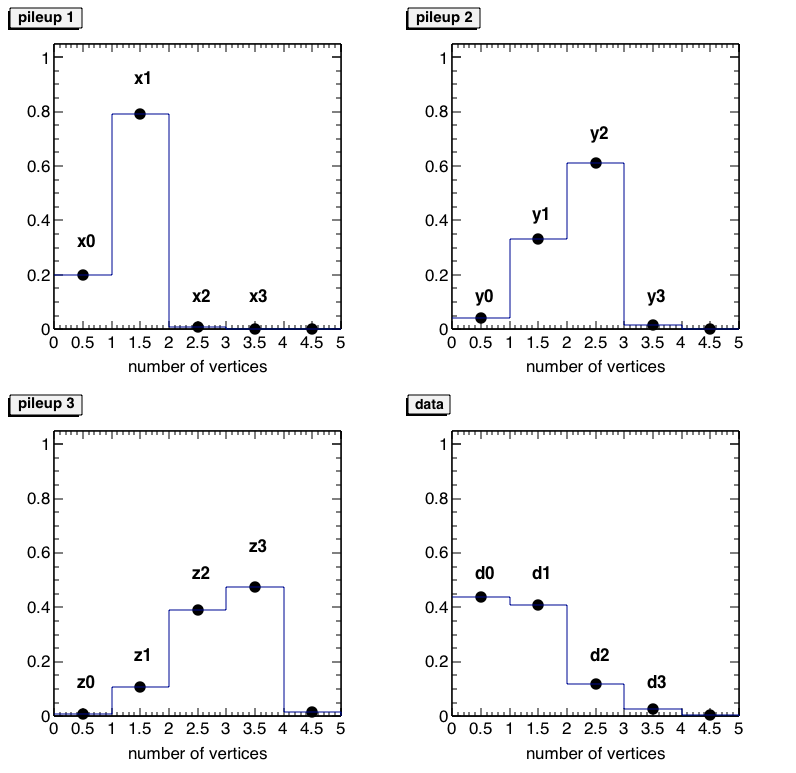

In [2]:
numberOfVertices = 'numberOfVertices.png'
Image( filename = pathname + numberOfVertices)

### Comparison


From the above equations, we have obtained,
$c_{0} = 0.342$
$c_{1} = 0.444$
$c_{2} = 0.160$
$c_{3} = 0.049$
, where the average pileup is around 0.9 and the probablity of having exactly 1 collision with respect to at least 1 collision is $\frac{c_{1}}{c_{1}+c_{2}+c_{3}} = 0.679$

From the other method, which estimate the pileup from HLT rate, we have calculated the average pileup $\mu = 0.7$ during run = 262274. Therefore, the probablity of having more than one collisions is, 

### $P (c\geqslant 1) = 1 - P (c = 0) = 1- \exp(-\mu) = 0.5$

and having exactly 1 collision is
### $P (c = 1) = \mu^{1}\exp(-\mu) = 0.34$

Therefore, the probablity of having 1 collision with respect to having at least 1 collision is,

### $\frac{P (c = 1)}{P (c\geqslant 1)} = 0.68 \approx 0.679$

This agreement is very well. 

### <hr> Back ups

- store some backup plots for further reference
    - dxy vs dz plots to see the spatial distribution of two vertices, but we don't cut on dxy since cutting dz would be enough
    - track impact paramater in z direction with respect to primary vertex in MC and Data

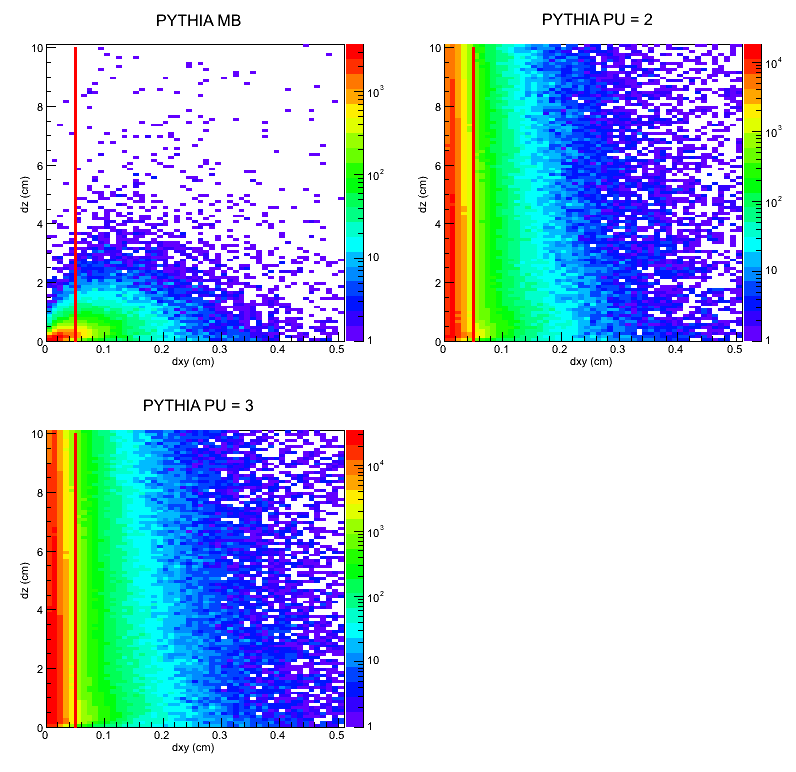

In [6]:
Image(filename = pathname + MCppDxyDz )

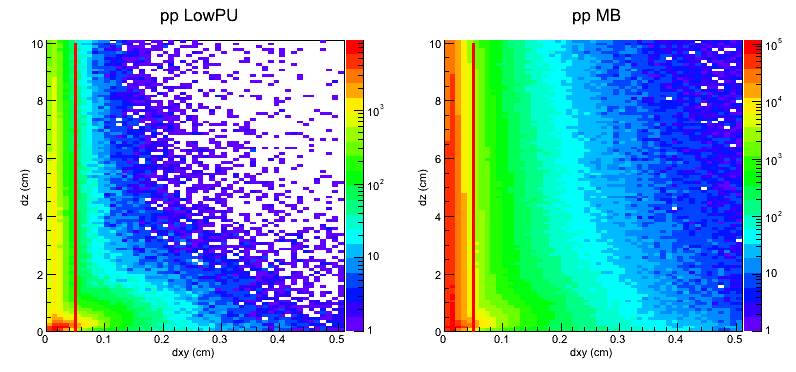

In [7]:
Image(filename = pathname + DATAppDxyDz )

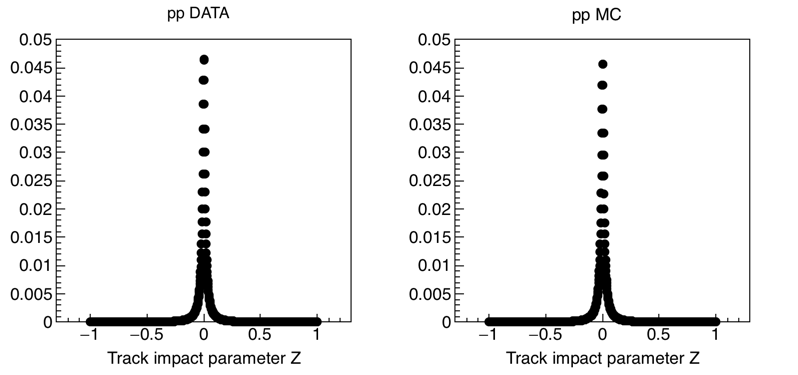

In [4]:
#track impact parameter Z with respect to primary vertex
Image(filename = pathname + DCA)